# Veriye İlk Bakış

In [15]:
import seaborn as sns
import pandas as pd
planet = sns.load_dataset('planets')
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Sorulması gereken ilk soru: Bu veriseti bize ne anlatıyor? Verisetinin oluşturulma şekli nedir? 

Üzerinde işlemler yapmadan önce mutlaka yedeği alınmalıdır. Aksi takdirde bazı geri dönüşü olmayan zararlar verebiliriz.

In [16]:
df = planet.copy()

## Verisetinin yapısal bilgilerine ulaşma

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


Object ile tanımlanmış tip aslında kategorik bir değişkendir. Kategorik değişkenler bir değişken türü olup iki çeşidi vardır. Bunlar ***nomial*** ve ***ordinal***dir. Nomial değişkenler arasında bir büyüklük-küçüklük gibi bir ilişkinin olmadığı kategorik değişken türüdür. Kişilerin cinsiyetleri, konuşabildikleri dil buna güzel bir örnektir. Ordinalde ise bir hiyerarşi bulunur. Örneğin askeri rütbeler veya kişilerin eğitim durumları gibi.

Geriye kalan int64, float64 gibi tipler ise sayısal değişkenlerdir. 

Sadece değişkenlere bakmak istediğimizde aşağıdaki kodu çalıştırılması gerekir. Görüleceği üzere method değişkeninin tipi object olarak verilmiştir. Bazı özel fonksiyonlar bunun kategorik bir değişken olarak algılayamaz.

In [18]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

Bu sebeple pandas kütüphanesinin Categorical metodu ile ilgili değişkenin kategorik bir değişken olduğunu belirtip, atama işlemi yapılır.

In [19]:
df.method= pd.Categorical(df.method)

Kontrol ettiğimizde artık category olarak belirtildiğini görürüz.

In [20]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [21]:
df.shape

(1035, 6)

In [22]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

## Veri Setinin Betimsel İstatistikleri

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


Pandasın describe metodu ile ilgili veri setinin istatistiklerine erişiriz. Yalnız burada eksik gözlemler gözardı edilir, kategorik değişkenler katılmaz.

Eğer NaN değerleri de incelemek istenirse include ='all' argümanıyla o değerlere de ulaşılır.

In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


***Not:*** Bazen kategorik değişkenler sayısal olarak ifade edilirler(Kadın1/Erkek0 gibi). Veri seti incelenirken bu durumlar göz önüne alınmalıdır 

***Not-2:*** Değişkenlerin değerlerini kendi içinde değerlendirirken, çaprazlama yapılabilir, böylelikle aralarındaki ilişkiler gözlemlenmiş olur.

## Eksik Değerleri İnceleme

Veri setinde eksik değerlerin olup olmadığını kontrol etmek için ***isnull()*** metodu kullanılır. Her değer için False/True değerleri yazılır.

In [25]:
df.isnull()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


***values*** eklenirse sonuna, sonuçları bir numpy arrayı olarak verir.

In [26]:
df.isnull().values

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False]])

***any()*** metodu ise numpy'in bir metodu bool türünde değer döndürür.

In [27]:
df.isnull().values.any()

True

***sum()*** ise, toplam değerleri verir. Buradaki örnekte __df__ data setinin featurelarına göre toplam kaç tane boş değer olduğunu gösterir.

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Eksik Değerler için Hızlı Çözümler

### 1.NaN değerlerine 0 değeri verme

***değişken_ismi*** yerine gelecek olan değişken yazılır. fillna metodu ile boş değerleri doldur denilir. inplace=True argümanı ise veri seti üzerinde geri dönülmez bir değişik yapar. Bu yüzden veri seti okunduktan sonra kopyası mutlaka alınmalıdır.

df['değişken_ismi'].fillna(0,inplace=True)

### 2.NaN değerlere ortalama değerlerin verilmesi

df.mean() ile NaN değerlere, her değişken için ortalama değer hesaplanır ve fillna() ile doldurulur.Eğer spesifik bir feature'da ortalama alınması isteniyorsa df['feature_ismi'] ile belirtilir.

df['değişken_ismi'].fillna(df.mean(),inplace=True)

In [16]:
df['mass'].mean()

2.6381605847953233

## Kategorik Değişken Özetleri

### Sadece Kategorik Değişkenler ve Özetleri

kat_df = df.select_dtypes(include =['object'])


Eğer bir dönüştürme işlemi yapılmışsa category olarak aranmalıdır.

In [17]:
kat_df = df.select_dtypes(include =['category'])
kat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [18]:
kat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [19]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

Saydırma Yöntemi

In [20]:
kat_df['method'].value_counts().count()

10

Pandas ile görselleştirme

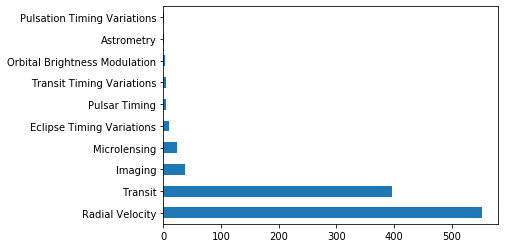

In [21]:
df['method'].value_counts().plot.barh();

### Sürekli Değişken Özetleri

In [22]:
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.T

,0,1,2,3,4,5,6,7,8,9,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034
number,1.0,1.000,1.00,1.00,1.00,1.00,1.00,1.00,1.0,2.00,...,1.00000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
orbital_period,269.3,874.774,763.00,326.03,516.22,185.84,1773.40,798.50,993.3,452.80,...,3.06785,0.925542,NaN,3.352057,NaN,3.941507,2.615864,3.191524,4.125083,4.187757
mass,7.1,2.210,2.60,19.40,10.50,4.80,4.64,NaN,10.3,1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,77.4,56.950,19.84,110.62,119.47,76.39,18.15,21.41,73.1,74.79,...,60.00000,470.000000,19.2,3200.000000,10.1,172.000000,148.000000,174.000000,293.000000,260.000000
year,2006.0,2008.000,2011.00,2007.00,2009.00,2008.00,2002.00,1996.00,2008.0,2010.00,...,2012.00000,2014.000000,2011.0,2012.000000,2012.0,2006.000000,2007.000000,2007.000000,2008.000000,2008.000000


### Belirli bir değişkenin istatistikleri

In [23]:
df_num['distance'].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

distance yerine - mean,count,max,min,median,std kullanılabilir

# Data Visualization

## Bar Plot

Kategorik değişkenleri görserlleştirmek için kullanılır.

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [24]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Veri setine hızlı bakış

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


## Ordinal tanımlama

Nomial değerler değil ordinal olduğunda pythona ifade edilmesi gerekilir.

In [27]:
from pandas.api.types import CategoricalDtype

In [28]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [29]:
df.cut =df.cut.astype(CategoricalDtype(ordered=True))
df.dtypes
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

Fakat sıralama yanlış olabilir.

cut_kategoriler = [sıralama nasıl olması gerekiyorsa]

In [30]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [31]:
df.cut = df.cut.astype(CategoricalDtype(categories= cut_kategoriler,ordered=True))

In [32]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

## Sütun Grafiğin(Bar plot) oluşturulması

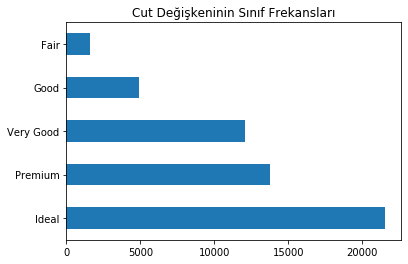

In [33]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

Text(0.5, 1.0, 'cut değişkeninin sınıf frekansları')

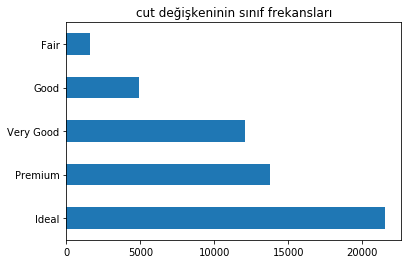

In [34]:
(df['cut']
            .value_counts()
            .plot.barh()
            .set_title('cut değişkeninin sınıf frekansları'))

seaborn ile ifade etme

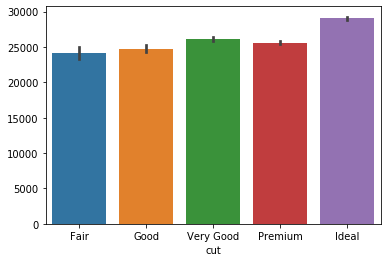

In [35]:
sns.barplot(x='cut',y=df.cut.index,data=df);

##  Sütun Grafik Çaprazlama

Çaprazlama: Veri setindeki değişkenlerin birlikte değerledirilmesi.

Kategorik değişkenleri görselleştirmede kullanılır.

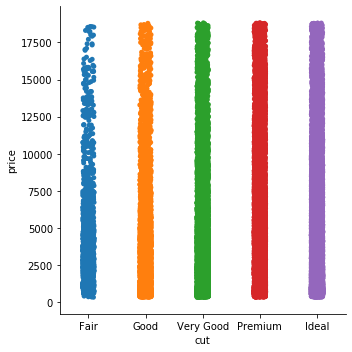

In [36]:
sns.catplot(x='cut',y='price',data=df);

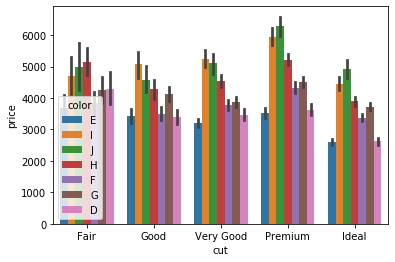

In [24]:
sns.barplot(x='cut',y='price',hue='color',data=df);

kırılım işlemi

In [26]:
df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

barplot hue ile eklenen boyut ile eksenler bozulsada değişkenliği ifade etmek açısından önemlidir. Bu durumlarda doğrulama yaparak elde edilen sonucun güvenirliği ölçülebilir.

## Histogram ve Yoğunluk grafiğinin oluşturulması

Histogram ve Yoğunluk sayısal değişkenlerin dağılımlarını göstermek için kullanılan grafikler

Dağılım görselleştirme

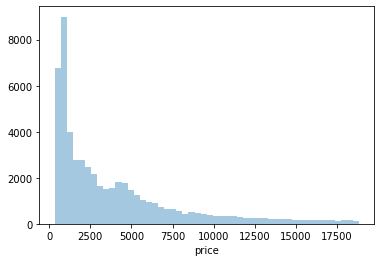

In [39]:
sns.distplot(df.price,kde=False);

***kde:*** Yoğunluk fonksiyonunda grafiğin üzerine koyulup koyulmama ayarı
sadece histogram oluşturulması istendiğinde kullanılmaz.

Histogram diğer grafik yöntemlere nazaran daha önemlidir. sayısal değişkenin dağılımı ile ilgili bilgiler verir. Eldeki değişkenlerin dağılımları önemlidir.
his. elimizdeki sayısal değişkeni belirli aralıklara böler. ve bu aralıklardaki dağılım hakkında bilgi verirr.
his. oluşturulurken önemli olan nokta sütunlar arasındaki boşluklarının ne kadar olacağıdır. ***Freedman-Diaconis kuralı*** ile belirlenir.

bins=hassaslaştırma gibi çubuk sayısı
hist=False his. kapatır.

Hist. ve yoğunluk grafiğinde çaprazlama

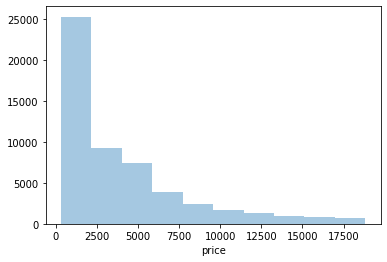

In [42]:
sns.distplot(df.price, bins = 10, kde = False);

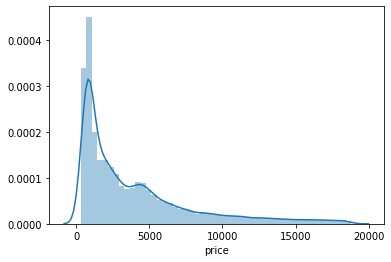

In [43]:
sns.distplot(df.price);

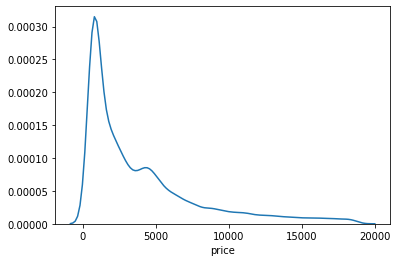

In [44]:
sns.distplot(df.price, hist = False);

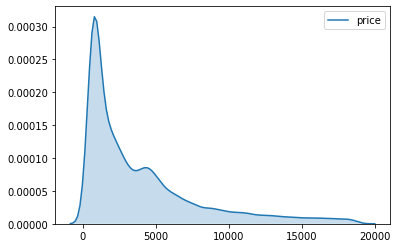

In [45]:
sns.kdeplot(df.price, shade = True);

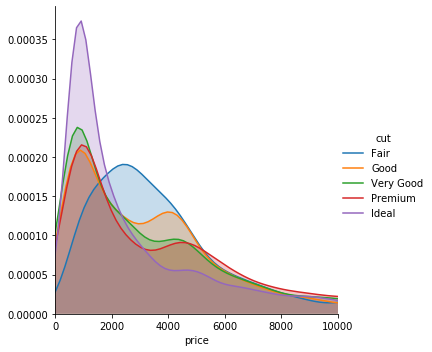

In [46]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

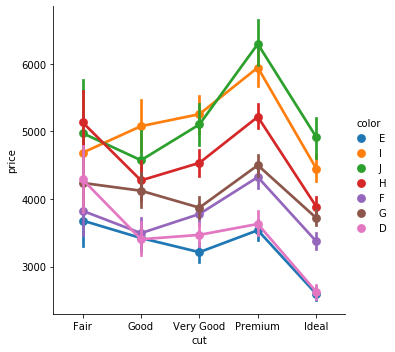

In [47]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Box Plot

### Veri Setinin Hikayesi

* total_bill: yemeğin toplam fiyatı
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti(0:male,1:female)
* smoker: grupta sigara içen var mı (0:no,1:Yes)
* day:gün 
* time:zaman
* size:gruptaki kişi sayısı

In [19]:
import seaborn as sns

In [20]:
tips = sns.load_dataset('tips')
df =tips.copy()
df.head().T

,0,1,2,3,4
total_bill,16.99,10.34,21.01,23.68,24.59
tip,1.01,1.66,3.5,3.31,3.61
sex,Female,Male,Male,Male,Female
smoker,No,No,No,No,No
day,Sun,Sun,Sun,Sun,Sun
time,Dinner,Dinner,Dinner,Dinner,Dinner
size,2,3,3,2,4


Box plot: Histogram gibi sürekli değişkenleri görselleştirmeye yarayan, histogramla beraber kullanılır.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [22]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [23]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

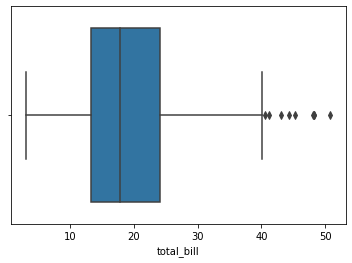

In [24]:
sns.boxplot(x=df['total_bill']);

barplot, sadece bir değişken göstermekten öte, aykırı gözlemler için kullanılır.

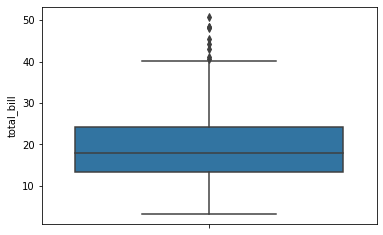

In [25]:
sns.boxplot(x=df['total_bill'],orient='v');

### Boxplot için çaprazlamaları

Hangi günler daha fazla kazanç sağlanıyor?

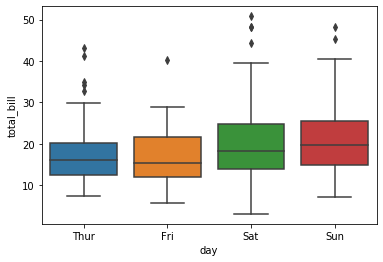

In [26]:
sns.boxplot(x='day',y='total_bill',data=df);

sabah mı akşam mı daha çok kazanç sağlanıyor?

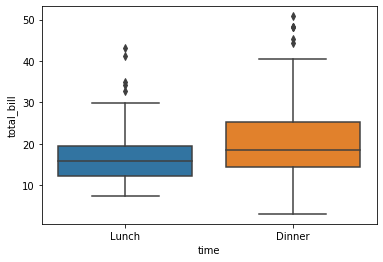

In [27]:
sns.boxplot(x='time',y='total_bill',data=df);

Grup sayısı ile kazancın arasındaki bağ?

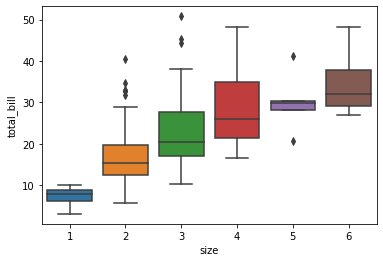

In [28]:
sns.boxplot(x='size',y='total_bill',data=df);

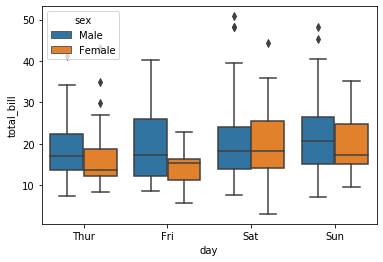

In [29]:
sns.boxplot(x='day',y='total_bill',hue='sex',data=df);

### Violin Grafiği

Dağılım için bilgi sağlar.

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


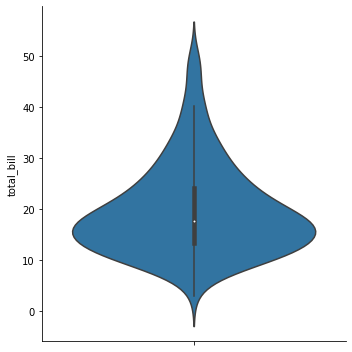

In [33]:
sns.catplot(y='total_bill',kind='violin',data=df);

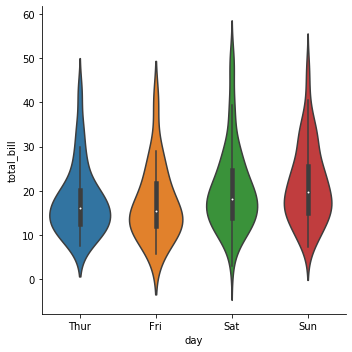

In [37]:
sns.catplot(x='day',y='total_bill',kind='violin',data=df);

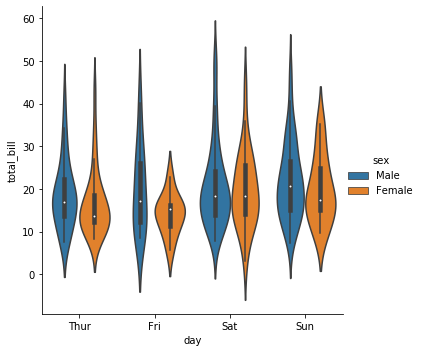

In [36]:
sns.catplot(x='day',y='total_bill',hue='sex',kind='violin',data=df);

## Kolerasyon Grafiği

Değişkenler arasındaki ilişkiyi ifaden eden terimdir. 

### Scatterplot

Sayısal değişkenler arasındaki ilişkiyi gösterir. İki değişkenin üstüne başka bir kırılım oluşturalacaktır.

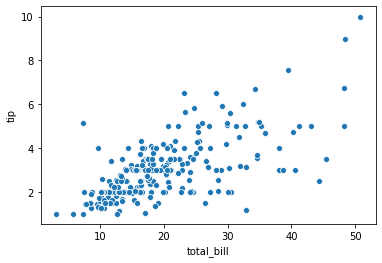

In [38]:
sns.scatterplot(x='total_bill',y='tip',data=df);

### Scatterplot ile çaprazlamalar

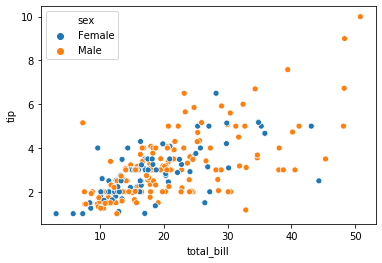

In [40]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=df);

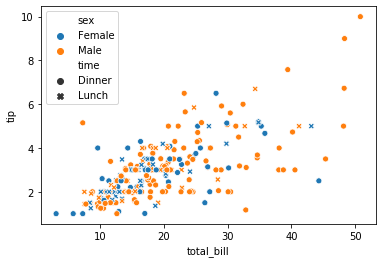

In [43]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',style='time',data=df);

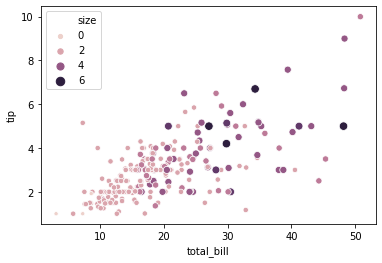

In [45]:
sns.scatterplot(x='total_bill',y='tip',hue='size',size='size',data=df);

## Doğrusal İlişkinin Gösterilmesi

In [46]:
import matplotlib.pyplot as plt

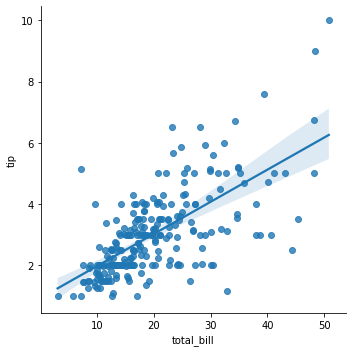

In [48]:
sns.lmplot(x='total_bill',y='tip',data=df);

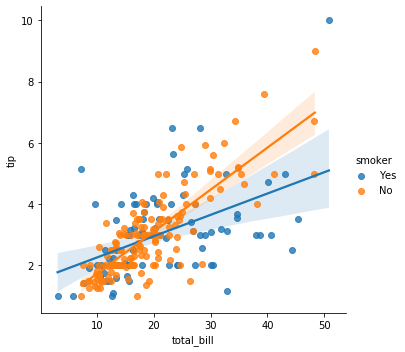

In [49]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=df);

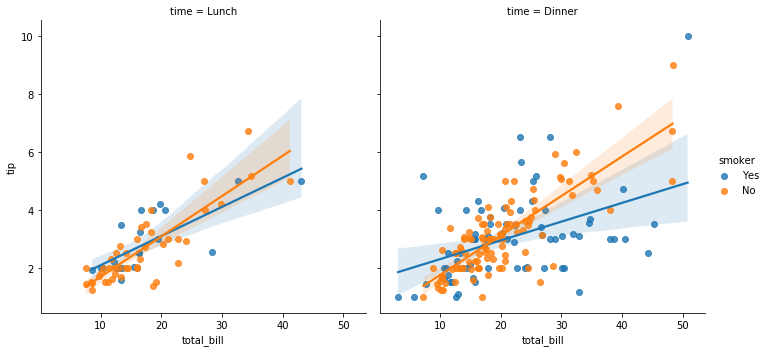

In [50]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',data=df);

Eğimler dikkate alınacak kadar olup olmadığını anlamak veri biliminin bilim kısmıdır

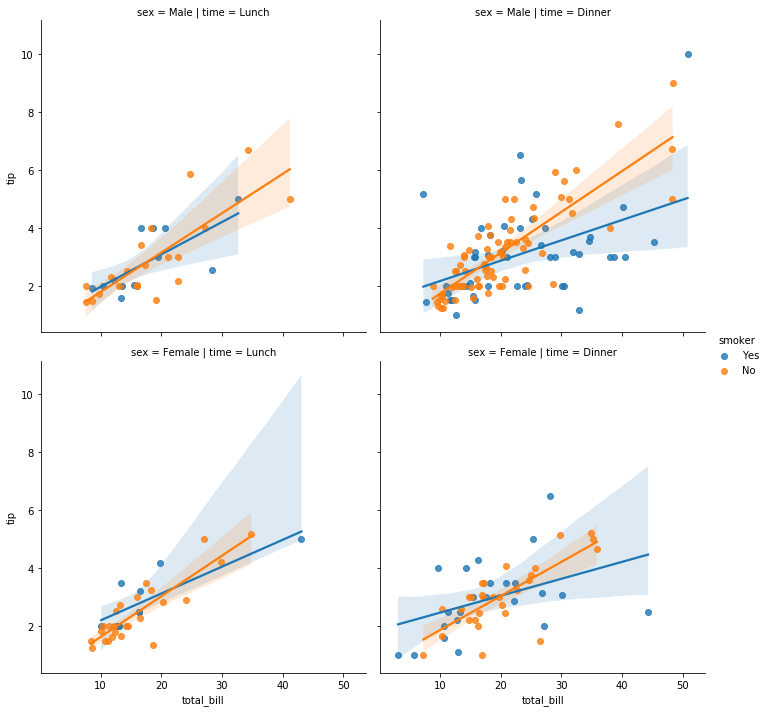

In [51]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',col='time',row='sex',data=df);

## Scatter Plot Matrisi

In [29]:
iris = sns.load_dataset('iris')
df_y = iris.copy()
df_y.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df_y.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [31]:
df_y.shape

(150, 5)

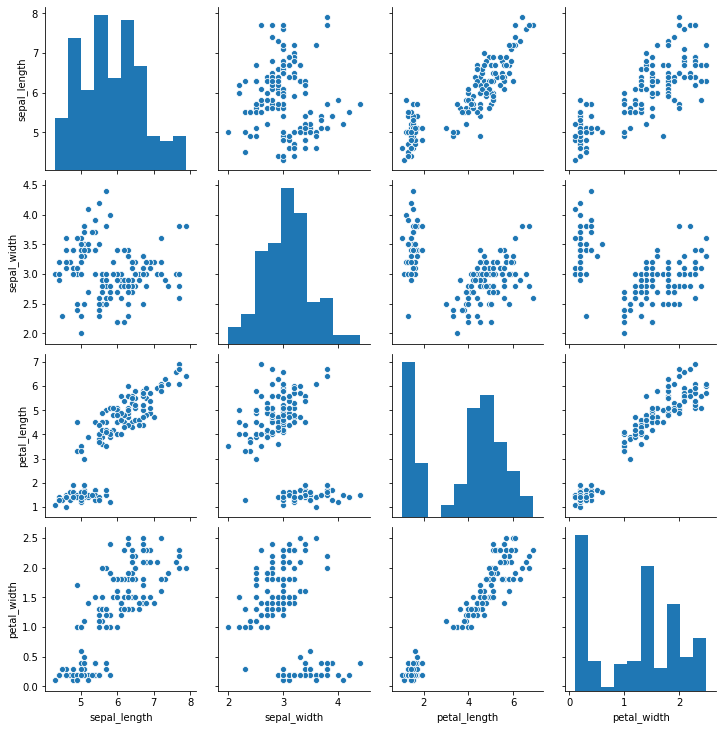

In [32]:
sns.pairplot(df_y);

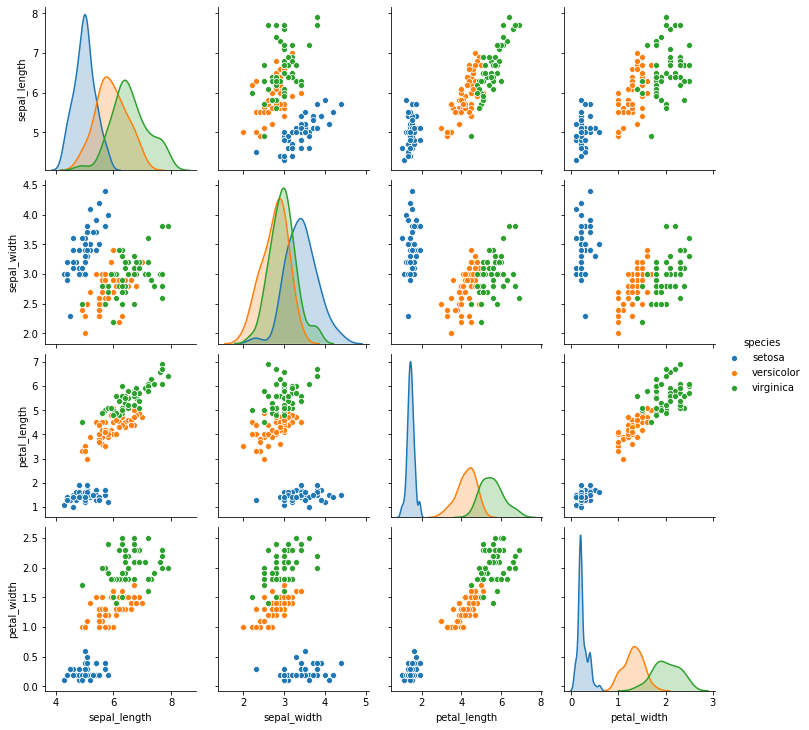

In [37]:
sns.pairplot(hue = "species",data=df_y);

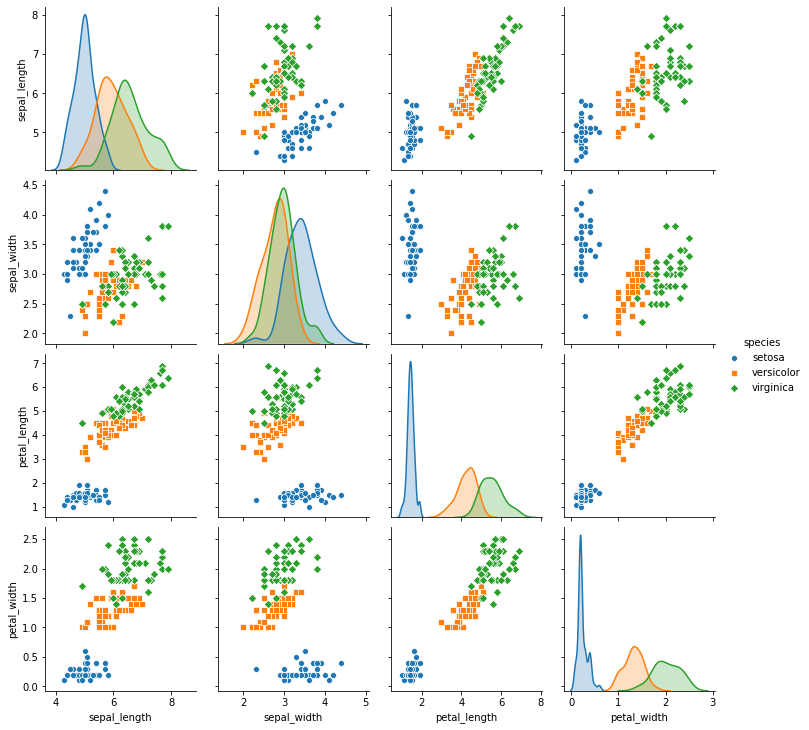

In [38]:
sns.pairplot(df_y, hue = "species", markers = ["o","s","D"]);

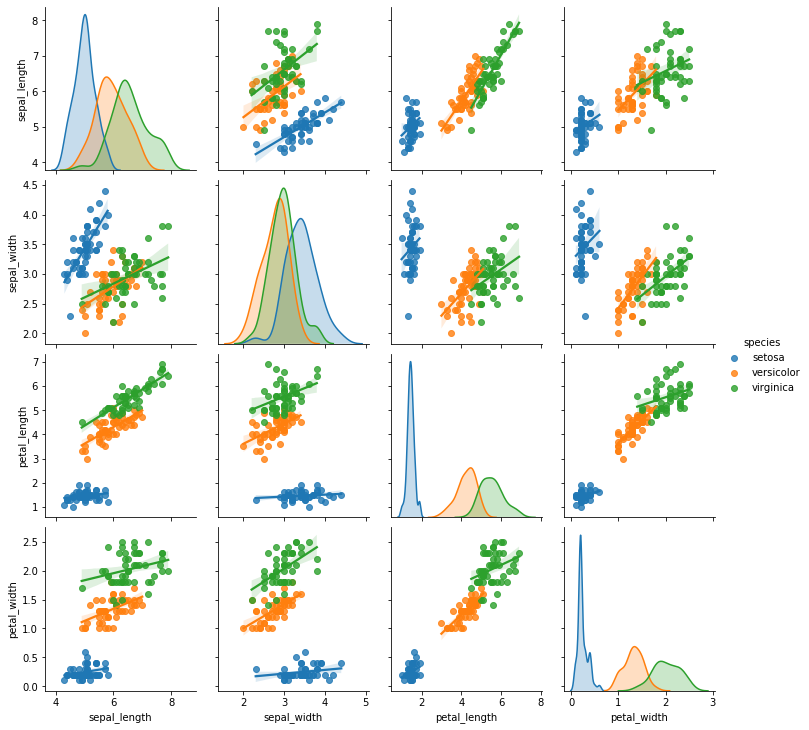

In [41]:
sns.pairplot(df_y, kind = "reg", hue = "species");

## HeapMap

In [42]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [43]:
df.shape

(144, 3)

In [44]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [45]:
df = df.pivot("month", "year", "passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


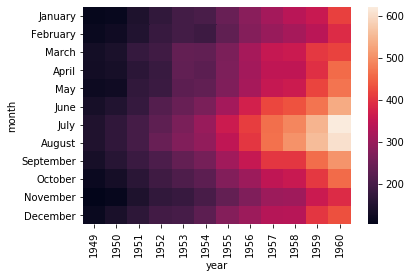

In [46]:
sns.heatmap(df);

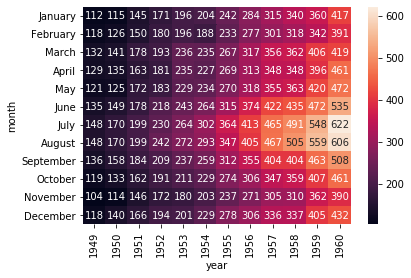

In [47]:
sns.heatmap(df, annot = True, fmt = "d");

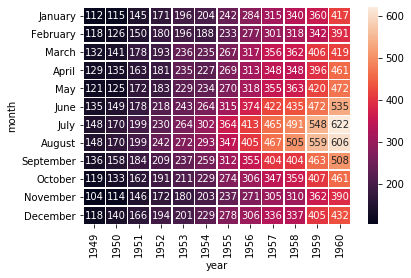

In [48]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

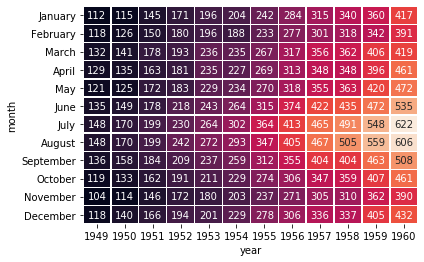

In [49]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

## Çizgi Grafik

In [50]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [51]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [52]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [53]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [54]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [55]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlamalar

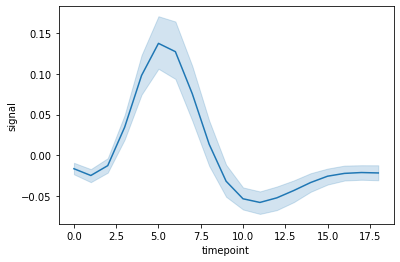

In [56]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

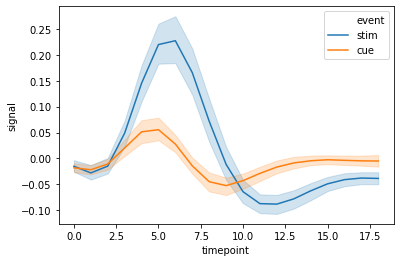

In [57]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

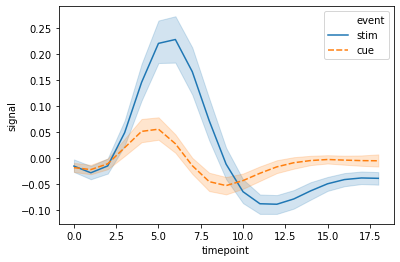

In [58]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

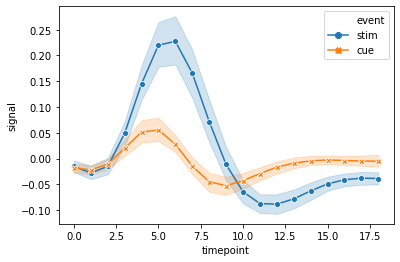

In [59]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);

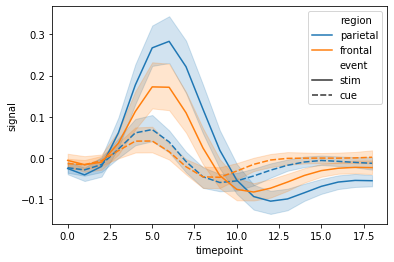

In [60]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);

## Basit Zaman Serisi Grafiği

In [62]:
import pandas_datareader as pr

In [63]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25")

In [64]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


In [65]:
kapanis = df["Close"]

In [66]:
kapanis.head()

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
Name: Close, dtype: float64

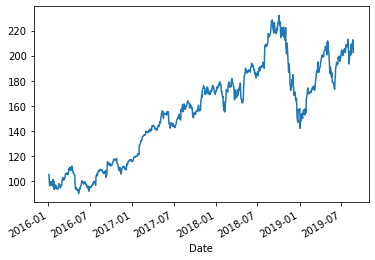

In [67]:
kapanis.plot();

In [68]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [69]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [70]:
kapanis.head()

Date
2016-01-04    105.349998
2016-01-05    102.709999
2016-01-06    100.699997
2016-01-07     96.449997
2016-01-08     96.959999
Name: Close, dtype: float64

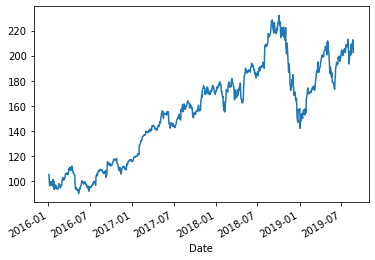

In [71]:
kapanis.plot();